# Data Wrangling - Review

**Objective**
1. Students will be able to understand the purpose and process of data wrangling.
2. Students will be able to utilize Pandas for data wrangling.
3. When given a dataset and objectives, students will be able to create a data profile report and implement wrangling.

**Not Objective**
1. Perform statistical analysis on data.
2. Prepare data for Machine Learning.

# Introduction to Data Wrangling

Data wrangling involves various activities to prepare data before the analysis stage. This is necessary because we assume data is of poor quality until proven good.

Bad data is data that slows down the process and confounds analysis results, including:
1. incorrect definitions
3. inconsistent structures
2. inaccurate values
4. incomplete information
5. structures that do not meet the analysis requirements (debatable!)

## Data Wrangling Process

Data wrangling consists of three main stages:
1. Access
2. Profile & Transform
3. Publish

### 1. Access

In this stage, we retrieve data from various sources such as databases, CSV files, spreadsheets, and APIs.

### 2. Profile & Transform

#### **Profiling**

Profiling is the process of understanding the current state of the data. At the beginning of this process, we need to find out information, including:
1. What is the definition of this data?
2. What is the definition of each column?
3. What should be the column data type?
4. What are the allowed values for each column?

##### Individual profiling
Checking the correctness at the cell level, including:
- correct data type, e.g., age is int, not str
- allowed values, e.g., age > 0
- correct structure, e.g., date formatted YYYY-MM-DD

##### Set-based profiling
Checking the correctness of values in groups, both columns and data subsets:
- duplication
- missing values
- valid percentage
- value distribution
- anomalies
- relationships between variables

Profiling results should be considered in determining the next steps in the DA/DS process.



#### **Transforming**

##### Cleansing
Cleansing is the process of clearing cell values, including:
- handling nulls
- handling duplicates
- structure validation

##### Structuring
Structuring is the process of changing the structure of data, including:
- sorting rows and columns
- splitting fields, e.g., `created_at:2020-12-31 -> (create_year:2020, create_month:12, create_date:31)`
- merging fields, e.g., `(id_prov:11, id_kota:01, id_kec:23) -> id_lokasi: 110123`
- aggregation
- pivoting

##### Enrichment
Enrichment is the process of enriching a dataset, including:

Enrichment can be achieved by joining with other datasets, e.g., `Transactions JOIN Customers ON customer_id` to obtain demographic information from transactions.

Enrichment can also be derived from value derivation, providing additional information through calculations such as:
- calculating the remaining warranty period from `purchase_date` and `guarantee_duration`
- predicting sentiment from `comments` in the `ProductReview` dataset
- finding location from `address` using the Google Maps API on `Outlets` data

### 3. Publish

At this stage, we share the ready-to-use data via database, CSV, spreadsheet, or WhatsApp.

# Speedrun Pandas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Accessing Datasets

### Load CSV

In [2]:
path = 'https://raw.githubusercontent.com/ywchiu/riii/refs/heads/master/data/house-prices.csv'
df_house_price = pd.read_csv(path)
df_house_price.head(2)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East


### Load Excel

In [3]:
url = "https://raw.githubusercontent.com/Kurikulum-Sekolah-Pacmann/wrangling-bfp-aksel/main/coffee_shop_sales.xlsx"
df_coffee_shop = pd.read_excel(url)
df_coffee_shop.head(2)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,NaN,Tea,NaN


### Load Dict

In [4]:
siswa_dict = {
    'nama': ['Ani', 'Budi', 'Charli'],
    'umur': [17, 18, 17]
}
pd.DataFrame(siswa_dict)

,nama,umur
0,Ani,17
1,Budi,18
2,Charli,17


Task:
- Loads data from local CSV
- Load data from xls & xlsx

In [26]:
path1 = 'vgsales_new.csv'
df_vgsales = pd.read_csv(path1, index_col = 0)
df_vgsales.head(5)

,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2010.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1989.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2012.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,2013.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,2000.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Dataframe

A Pandas DataFrame is a columnar data structure. A DataFrame is a collection of n columns, each of which is a Numpy series.

A Numpy series is a 1D list containing elements of the same data type, each with an index.

In [6]:
nama = np.array(['Ani', 'Budi', 'Charli'])
nama

array(['Ani', 'Budi', 'Charli'], dtype='<U6')

In [7]:
nama.shape

(3,)

In [8]:
# baris x kolom
df_house_price.shape

(128, 8)

In [9]:
# kolom Price merupakan series dengan index [0..] dan value int64
df_house_price['Price']

0      114300
1      114200
2      114800
3       94700
4      119800
        ...  
123    119700
124    147900
125    113500
126    149900
127    124600
Name: Price, Length: 128, dtype: int64

In [10]:
# kolom Neighborhood merupakan series dengan index [0..] dan tipe object
# ambil 5 baris teratas
df_house_price['Neighborhood'].head(5)

0    East
1    East
2    East
3    East
4    East
Name: Neighborhood, dtype: object

In [11]:
# ambil kolom Price & Neighborhood
# ambil 5 baris terbawah
df_house_price[['Price', 'Neighborhood']].tail(5)

,Price,Neighborhood
123,119700,East
124,147900,East
125,113500,North
126,149900,West
127,124600,North


### Summarizing Dataframe

In [12]:
df_house_price.head(2)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East


In [13]:
df_house_price.dtypes

Home             int64
Price            int64
SqFt             int64
Bedrooms         int64
Bathrooms        int64
Offers           int64
Brick           object
Neighborhood    object
dtype: object

In [14]:
df_house_price['Price'].describe()

count       128.000000
mean     130427.343750
std       26868.770371
min       69100.000000
25%      111325.000000
50%      125950.000000
75%      148250.000000
max      211200.000000
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

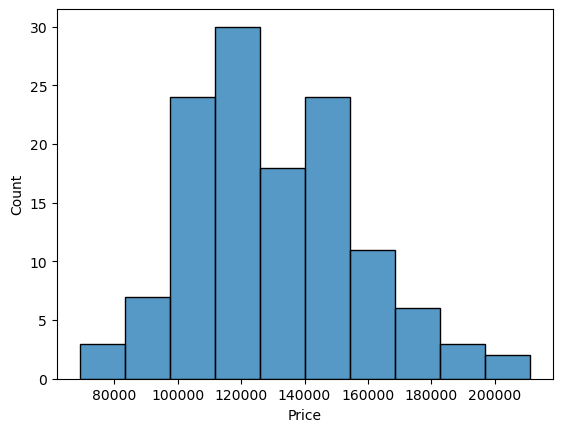

In [15]:
# QUESTION: Bagaimana kita membaca plot ini?
sns.histplot(data=df_house_price, x='Price')

ANSWERS: The data distribution is more like bimodal distribution. Mostly the price of house is in range of 100,000 - 130,000 and 140,000 - 150,000.

In [16]:
df_house_price['Neighborhood'].describe()

count      128
unique       3
top       East
freq        45
Name: Neighborhood, dtype: object

In [17]:
df_house_price['Neighborhood'].unique()

array(['East', 'North', 'West'], dtype=object)

<Axes: xlabel='SqFt', ylabel='Price'>

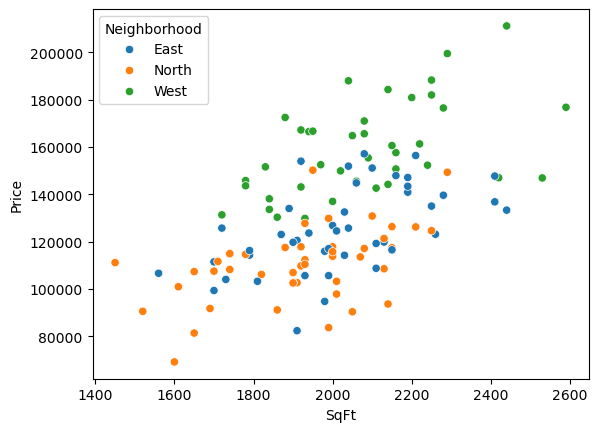

In [18]:
# QUESTION: Bagaimana kita membaca plot ini?
sns.scatterplot(
    data=df_house_price, x='SqFt', y='Price', hue='Neighborhood'
)

ANSWERS: Based on scatterplot above, we can know the North neighborhood is more affordable than the neighborhood. While the West Neighborhood have the higher house price but only on some property that have a >2400 sqft land.